In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
# Loading dataset
data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()
# Cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [3]:
df_no_degree = df[df['job_no_degree_mention'] == True].copy()

In [4]:

df_no_degree['job_posted_month'] = df_no_degree['job_posted_date'].dt.strftime('%B')
top_jobs = (df_no_degree['job_title_short']
            .value_counts()
            .head(3)
            .index)

In [5]:
df_pivot = df_no_degree.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')

In [6]:
df_pivot.reset_index(inplace=True)
df_pivot['month_no'] = pd.to_datetime(df_pivot['job_posted_month'],format = '%B')
df_pivot['month_no'] = df_pivot['month_no'].dt.month

In [7]:
df_pivot.sort_values(by='month_no',inplace=True)
df_pivot.set_index(keys='job_posted_month',inplace=True)

In [8]:
df_pivot.drop(labels='month_no',axis=1,inplace=True)

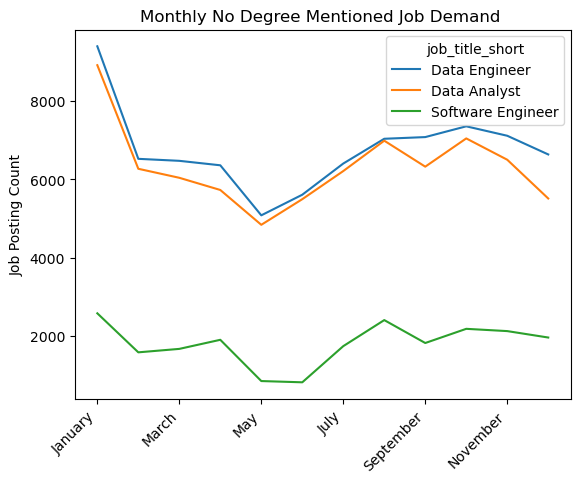

In [9]:
df_pivot[top_jobs].plot(kind='line')
plt.title('Monthly No Degree Mentioned Job Demand ')
plt.ylabel('Job Posting Count')
plt.xlabel('')
plt.xticks(rotation = 45 , ha='right')
plt.show()